In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score,mean_squared_error,log_loss
from tqdm import tqdm_notebook
import seaborn as sns
import imageio
from IPython.display import HTML
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

In [4]:
my_cmap= matplotlib.colors.LinearSegmentedColormap.from_list("",['red','yellow','green'])

In [5]:
np.random.seed(0)

# Generating Blob data

In [6]:
data, labels= make_blobs(1000,2,6,random_state=0)
print(data.shape,labels.shape,labels)

(1000, 2) (1000,) [5 4 1 2 5 3 5 1 4 3 0 0 5 1 0 1 4 0 0 5 0 0 1 0 0 5 4 3 4 3 1 3 3 2 0 5 4
 5 0 5 0 4 3 4 5 1 4 3 2 2 3 1 4 3 3 3 2 1 4 0 0 5 1 5 0 2 3 0 2 2 4 0 3 5
 5 5 4 0 0 5 5 5 0 2 1 2 5 1 5 5 2 0 4 4 1 3 2 5 0 0 4 2 1 2 0 1 0 2 1 4 3
 4 3 1 3 3 3 0 3 2 0 0 0 2 0 5 3 5 4 3 3 4 2 0 1 5 4 2 1 0 4 4 2 3 3 0 1 0
 0 2 0 5 5 5 3 1 2 0 5 3 1 0 3 5 2 0 1 0 5 1 0 5 0 4 5 1 5 0 4 0 0 0 2 3 5
 0 2 3 1 3 3 2 1 5 4 1 2 4 0 2 0 3 0 3 3 2 3 4 1 1 1 5 4 1 3 5 5 4 2 1 1 5
 3 0 1 0 4 4 3 1 2 4 2 3 0 4 1 5 3 0 1 5 1 1 4 3 4 1 0 1 1 3 1 0 3 5 4 5 2
 0 5 2 4 0 2 5 4 0 3 0 1 4 0 2 4 1 5 0 4 5 5 5 1 2 5 5 5 4 5 4 1 2 3 1 1 4
 5 5 0 4 5 4 2 1 5 3 3 1 1 1 5 1 3 5 2 3 4 1 0 2 0 0 0 5 1 5 0 4 3 0 5 0 3
 1 3 5 0 5 2 4 5 3 1 3 5 3 4 3 0 2 0 4 0 2 1 3 2 2 4 5 1 5 1 4 1 0 5 3 3 3
 1 0 0 1 2 5 3 4 5 4 0 5 1 3 2 5 2 4 1 5 5 5 0 2 2 3 1 2 5 4 3 5 3 5 2 5 3
 2 4 2 1 0 2 5 0 5 3 4 5 0 0 0 3 4 0 3 3 4 1 0 5 1 2 0 5 5 3 5 1 4 3 1 1 3
 3 5 2 5 1 4 0 2 5 2 5 4 3 3 1 2 0 0 0 4 2 0 5 4 2 3 1 5 1 1 3 2 1 3 5 2 2
 4 5 2 

[]

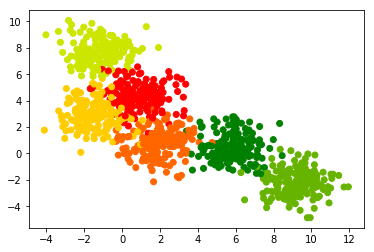

In [7]:
plt.scatter(data[:,0],data[:,1],c=labels,cmap=my_cmap)
plt.plot()

In [8]:
labels_orig=labels
labels=np.mod(labels,2)

[]

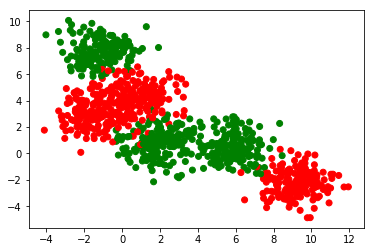

In [9]:
plt.scatter(data[:,0],data[:,1],c=labels,cmap=my_cmap)
plt.plot()

In [10]:
X_train,X_val,Y_train,Y_val=tts(data,labels,stratify=labels,random_state=0)
print(X_train.shape,X_val.shape,Y_train.shape,Y_val.shape)

(750, 2) (250, 2) (750,) (250,)


# Our FF Network

In [11]:
class ffnetworkw1:
    
    def __init__(self):
        self.w1=np.random.randn()
        self.w2=np.random.randn()
        self.w3=np.random.randn()
        self.w4=np.random.randn()
        self.w5=np.random.randn()
        self.w6=np.random.randn()
        self.b1=0
        self.b2=0
        self.b3=0
        
        
    def sigmoid(self,x):
        return 1.0/(1.0+np.exp(-x))
    
    def forward_pass(self,x):
        self.x1,self.x2=x
        self.a1=self.w1 * self.x1 + self.w2 * self.x2 + self.b1
        self.a2=self.w3 * self.x1 + self.w4 * self.x2 + self.b2
        self.h1=self.sigmoid(self.a1)
        self.h2=self.sigmoid(self.a2)
        self.a3=self.h1 * self.w5 + self.h2 * self.w6 + self.b3
        self.h3=self.sigmoid(self.a3)
        return self.h3
    
    def grad(self,x,y):
        self.forward_pass(x)
        self.dw1=(self.h3-y) * self.h3 * (1-self.h3) * self.w5 * self.h1 * (1 - self.h1) * self.x1
        self.dw2=(self.h3-y) * self.h3 * (1-self.h3) * self.w5 * self.h1 * (1 - self.h1) * self.x2
        self.db1=(self.h3-y) * self.h3 * (1-self.h3) * self.w5 * self.h1 * (1 - self.h1)
        
    def fit(self,X,Y,epoch=100,lr=0.01,display_loss=True):
        
        if display_loss:
            loss = {}
            w1={}
        
        for i in tqdm_notebook(range(epoch),unit="epochs",total=epoch):
            dw1,dw2,dw3,dw4,dw5,dw6,db1,db2,db3 = [0]*9
            for x,y in zip(X,Y):
                self.grad(x,y)
                dw1 +=self.dw1
                dw2 +=self.dw2
                db1 +=self.db1
                
            m=X.shape[0]
            self.w1 -= lr * dw1/m
            self.w2 -= lr * dw2/m
            self.b1 -= lr * db1/m
            
            if display_loss:
                w1[i]=self.w1
                Y_pred = self.predict(X)
                loss[i]=mean_squared_error(Y_pred,Y)
                
        if display_loss:
            plt.tight_layout()
            plt.subplot(2,1,1)
            plt.plot(w1.values())
            plt.xlabel("Epochs")
            plt.ylabel("w1")
            
            plt.subplot(2,1,2)
            plt.plot(loss.values())
            plt.xlabel("Epochs")
            plt.ylabel("loss MSE")
            
            plt.show()
            
    def predict(self,X):
        Y_pred=[]
        for x in X:
            y_pred = self.forward_pass(x)
            Y_pred.append(y_pred)
        return np.array(Y_pred)
        
        
        

In [12]:
ffw1=ffnetworkw1()


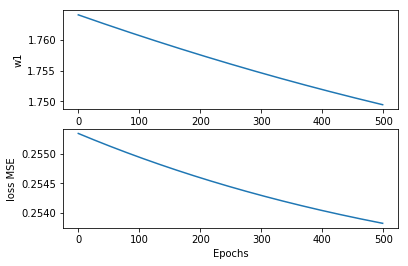

In [13]:
ffw1.fit(X_train,Y_train,500,.01)

In [14]:
Y_pred=ffw1.predict(X_train)
# print(Y_pred.shape)
Y_pred = (Y_pred > 0.5).astype("int")
# print(Y_pred.shape)

In [15]:
accuracy = accuracy_score(Y_train,Y_pred)
accuracy

0.6

## Now updating all weights at one go

In [45]:
class ffnetwork:
    
    def __init__(self):
        self.w1=np.random.randn()
        self.w2=np.random.randn()
        self.w3=np.random.randn()
        self.w4=np.random.randn()
        self.w5=np.random.randn()
        self.w6=np.random.randn()
        self.b1=0
        self.b2=0
        self.b3=0
        
    def sigmoid(self,x):
        return 1.0/(1.0 + np.exp(-x))
    
    def forward_pass(self,x):
        self.x1,self.x2=x
        self.a1= self.w1 * self.x1 + self.w2 * self.x2 + self.b1
        self.a2= self.w3 * self.x1 + self.w4 * self.x2 + self.b2
        self.h1=self.sigmoid(self.a1)
        self.h2=self.sigmoid(self.a2)
        self.a3= self.w5 * self.h1 + self.w6 * self.h2 + self.b3
        self.h3=self.sigmoid(self.a3)
        return self.h3
    
    
    def grad(self,x,y):
        self.forward_pass(x)
        self.dw5 = (self.h3-y) * self.h3* (1-self.h3)*self.h1
        self.dw6 = (self.h3-y) * self.h3* (1-self.h3)*self.h2
        self.db3 = (self.h3-y) * self.h3* (1-self.h3)
        
        self.dw1 = (self.h3-y) * self.h3* (1-self.h3) * self.w5 * self.h1 * (1-self.h1) * self.x1
        self.dw2 = (self.h3-y) * self.h3* (1-self.h3) * self.w5 * self.h1 * (1-self.h1) * self.x2
        self.db1 = (self.h3-y) * self.h3* (1-self.h3) * self.w5 * self.h1 * (1-self.h1)
        
        self.dw3 = (self.h3-y) * self.h3* (1-self.h3) * self.w6 * self.h2 * (1-self.h2) * self.x1
        self.dw4 = (self.h3-y) * self.h3* (1-self.h3) * self.w6 * self.h2 * (1-self.h2) * self.x2
        self.db2 = (self.h3-y) * self.h3* (1-self.h3) * self.w6 * self.h2 * (1-self.h2)
        
    def predict(self,X):
        Y_pred=[]
        for x in X:
            y_pred=self.forward_pass(x)
            Y_pred.append(y_pred)
        return np.array(Y_pred)
    
    def predicth1(self,X):
        Y_pred=[]
        for x in X:
            y_pred=self.forward_pass(x)
            Y_pred.append(self.h1)
        return np.array(Y_pred)
    
    def predicth2(self,X):
        Y_pred=[]
        for x in X:
            y_pred=self.forward_pass(x)
            Y_pred.append(self.h2)
        return np.array(Y_pred)
    
    def predicth3(self,X):
        Y_pred=[]
        for x in X:
            y_pred=self.forward_pass(x)
            Y_pred.append(self.h3)
        return np.array(Y_pred)
    
    def fit(self,X,Y,epoch=100,lr=0.01,init=False,display_loss=True, display_weight=True):
        
        if init:
            self.w1=np.random.randn()
            self.w2=np.random.randn()
            self.w3=np.random.randn()
            self.w4=np.random.randn()
            self.w5=np.random.randn()
            self.w6=np.random.randn()
            self.b1=0
            self.b2=0
            self.b3=0
            
        if display_loss:
            loss = {}
            
#         if display_weight:
#             matrices = []
            
        for i in tqdm_notebook(range(epoch),total=epoch, unit="epoch"):
            dw1,dw2,dw3,dw4,dw5,dw6,db1,db2,db3 = [0]*9
            for x,y in zip(X,Y):
                self.grad(x,y)
                dw1 += self.dw1
                dw2 += self.dw2
                dw3 += self.dw3
                dw4 += self.dw4
                dw5 += self.dw5
                dw6 += self.dw6
                db1 += self.db1
                db2 += self.db2
                db3 += self.db3
                
            m=X.shape[0]
            self.w1 -= lr * dw1/m
            self.w2 -= lr * dw2/m
            self.w3 -= lr * dw3/m
            self.w4 -= lr * dw4/m
            self.w5 -= lr * dw5/m
            self.w6 -= lr * dw6/m
            self.b1 -= lr * db1/m
            self.b2 -= lr * db2/m
            self.b3 -= lr * db3/m
            
            if display_loss:
                Y_pred=self.predict(X)
                loss[i]=mean_squared_error(Y,Y_pred)
                
            if display_weight:
                matrix=np.array([[0,0,self.w5,self.w6,self.b3,0],[self.w1,self.w2,self.b1,self.w3,self.w4,self.b2]])
                matrices.append(matrix)
        
        if display_loss:
            plt.plot(loss.values())
            plt.xlabel("Epoch")
            plt.ylabel("MSE")
            plt.show()
                
        
                
                

In [46]:
matrices=[]
ffn=ffnetwork()


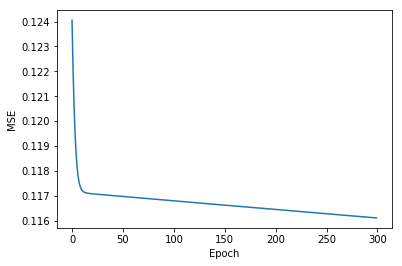

In [65]:
ffn.fit(X_train,Y_train,300,.1)

In [66]:
Y_pred=ffn.predict(X_train)
# print(Y_pred.shape)
Y_pred = (Y_pred > 0.5).astype("int")
# print(Y_pred.shape)

In [67]:
accuracy=accuracy_score(Y_train,Y_pred)
accuracy

0.9653333333333334

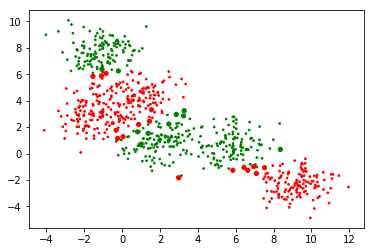

In [68]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred, cmap=my_cmap, s=15*(np.abs(Y_pred-Y_train)+.2))
plt.show()

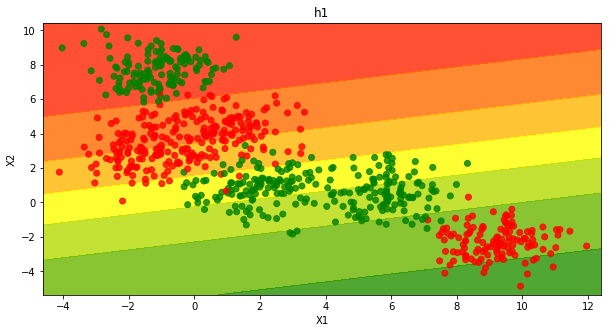

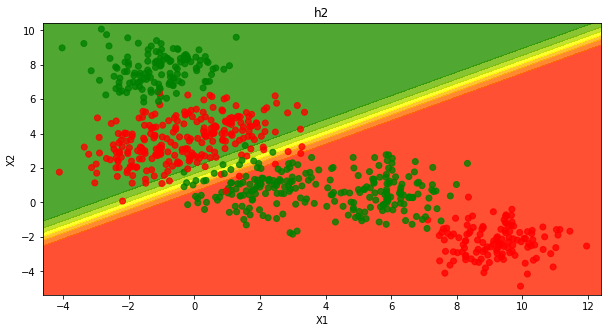

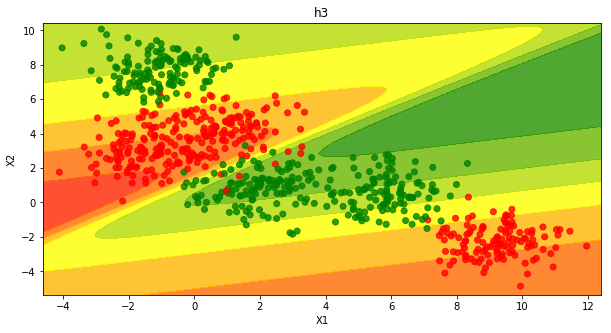

In [69]:
def make_meshgrid(x,y,h=.2):
    x_min,x_max=x.min() - 0.5, x.max() + 0.5
    y_min,y_max=y.min() - 0.5, y.max() + 0.5
    xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
    return xx,yy

def plot_contours(ax,predict,xx,yy,**params):
    z=predict(np.c_[xx.ravel(),yy.ravel()])
    z=z.reshape(xx.shape)
    out = ax.contourf(xx,yy,z,**params)
    return out

def plot_boundary():
    xx,yy=make_meshgrid(X_train[:,0],X_train[:,1])
    predict_fun=[ffn.predicth1,ffn.predicth2,ffn.predicth3]
    
    for i in range(3):
        fig,ax=plt.subplots(figsize=(10,5))
        plot_contours(ax,predict_fun[i],xx,yy,cmap=my_cmap,alpha=0.8)
        ax.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=my_cmap,alpha=0.8)
        ax.set_xlim(xx.min(),xx.max())
        ax.set_ylim(yy.min(),yy.max())
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_title('h' +str(i+1))
    return
plot_boundary()

In [78]:
def plot_heatmap(epoch):
    fig=plt.figure(figsize=(10,1))
    sns.heatmap(matrices[epoch],annot=True,cmap=my_cmap,vmin=-5,vmax=5)
    plt.title("Epoch " + str(epoch))
    fig.canvas.draw()
    image=np.frombuffer(fig.canvas.tostring_rgb(),dtype='uint8')
    image= image.reshape(fig.canvas.get_width_height()[::-1]+(3,))
    return image
    

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


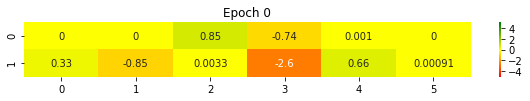

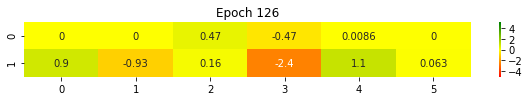

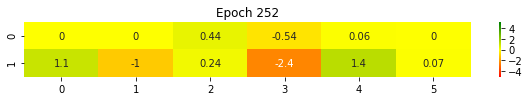

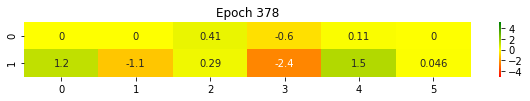

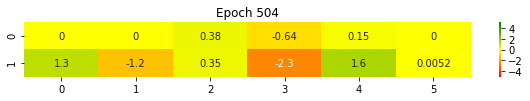

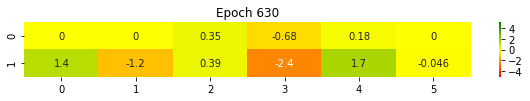

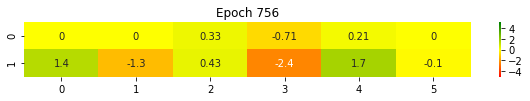

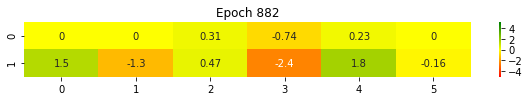

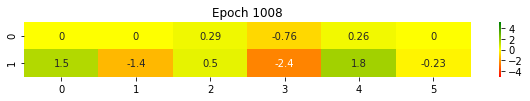

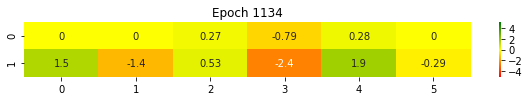

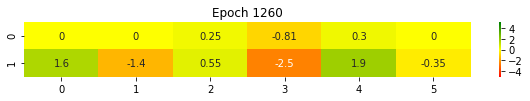

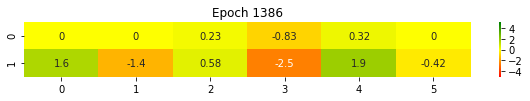

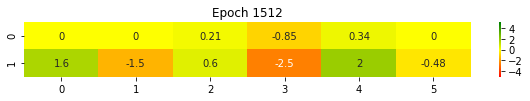

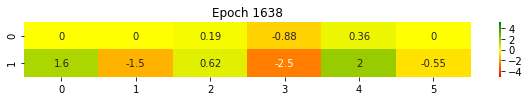

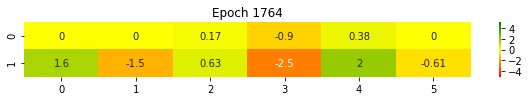

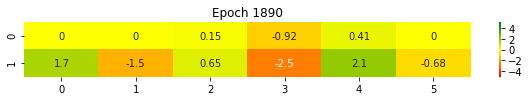

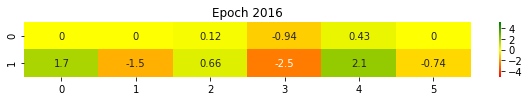

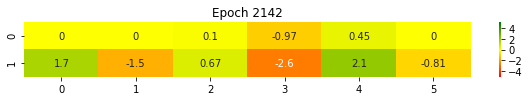

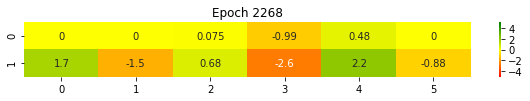

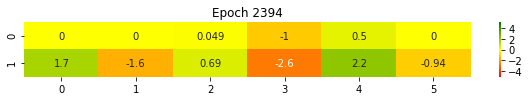

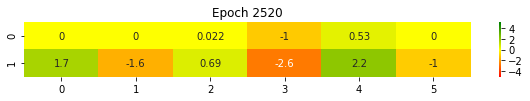

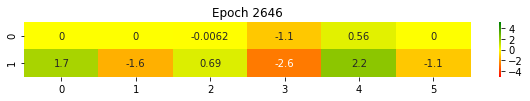

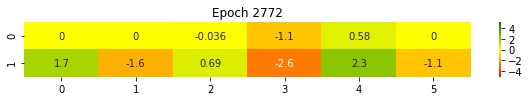

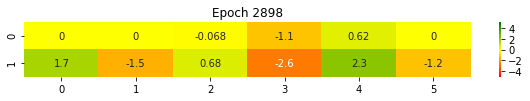

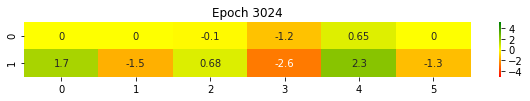

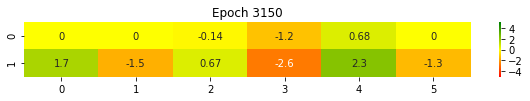

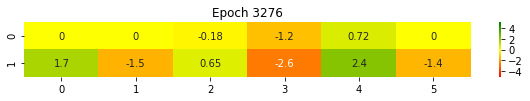

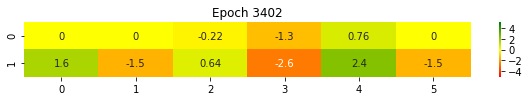

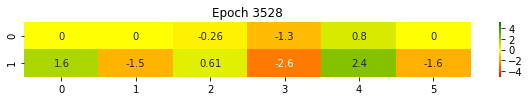

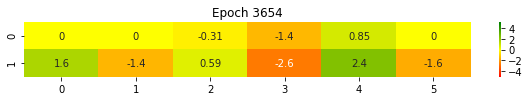

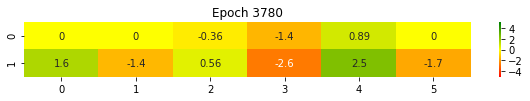

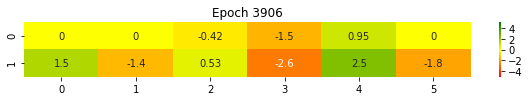

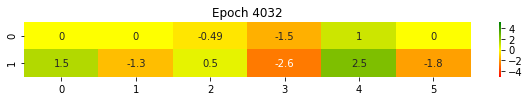

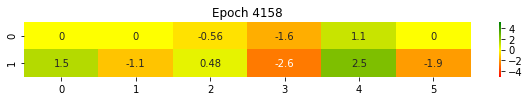

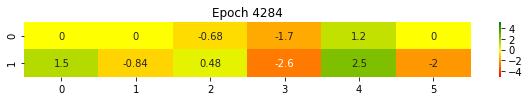

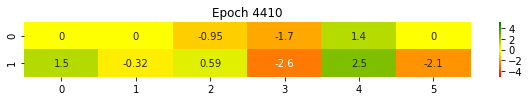

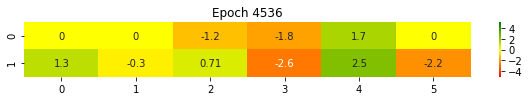

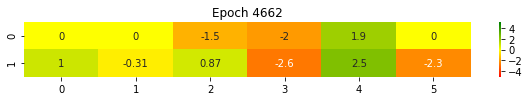

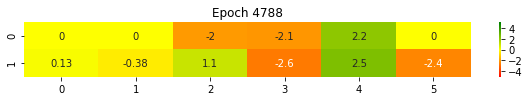

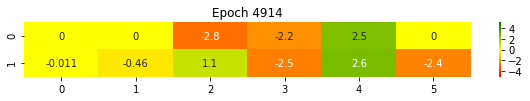

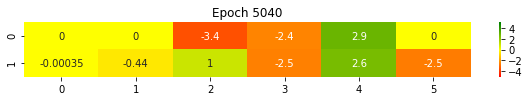

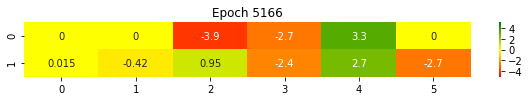

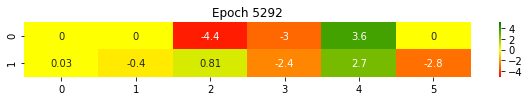

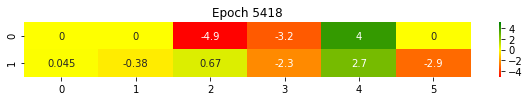

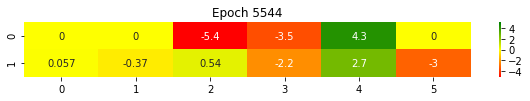

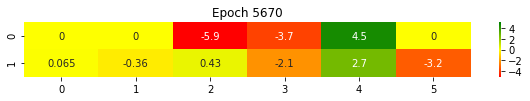

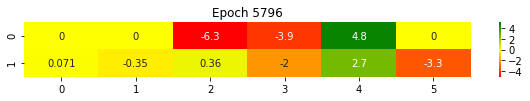

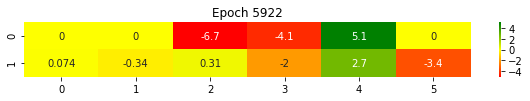

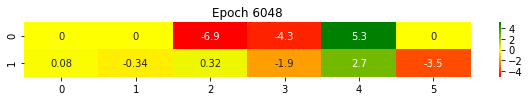

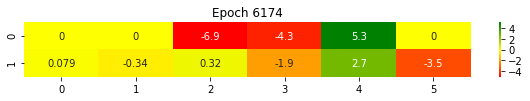

In [79]:
imageio.mimsave('./weights_viz.gif', [plot_heatmap(i) for i in range(0,len(matrices),len(matrices)//50)],fps=1)

In [80]:
from IPython import display

In [81]:
HTML('<img src="weights_viz.gif">')

In [83]:
Y_pred_val= ffn.predict(X_val)
Y_pred_val=(Y_pred_val>0.5).astype("int")
accuracy_val=accuracy_score(Y_val,Y_pred_val)
print(accuracy,accuracy_val)

0.9653333333333334 0.948


<function matplotlib.pyplot.show(*args, **kw)>

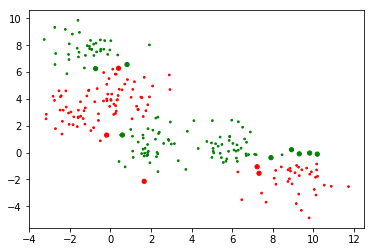

In [84]:
plt.scatter(X_val[:,0],X_val[:,1],c=Y_pred_val,cmap=my_cmap,s=15*(np.abs(Y_pred_val-Y_val) + .2))
plt.show

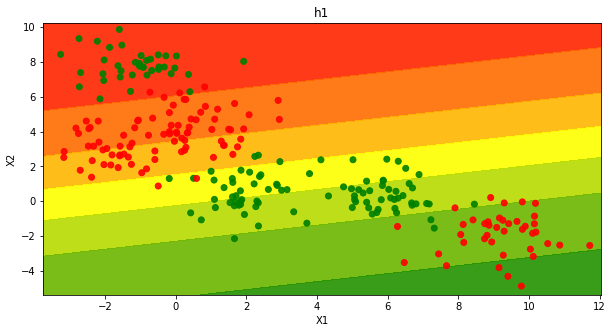

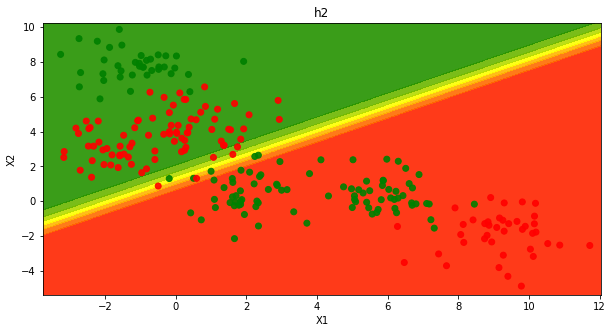

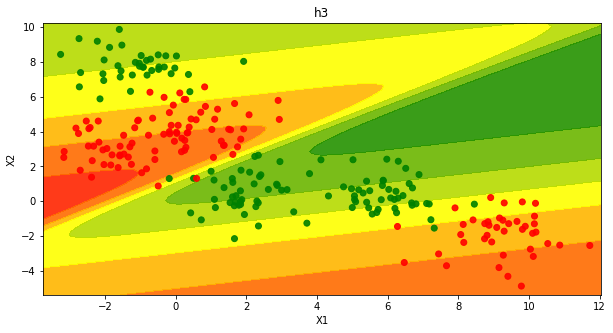

In [88]:
def plot_boundary_val():
    xx,yy=make_meshgrid(X_val[:,0],X_val[:,1])
    predict_fun=[ffn.predicth1,ffn.predicth2,ffn.predicth3]
    
    for i in range(3):
        fig,ax=plt.subplots(figsize=(10,5))
        plot_contours(ax,predict_fun[i],xx,yy,cmap=my_cmap,alpha=0.9)
        ax.scatter(X_val[:,0],X_val[:,1],c=Y_val,cmap=my_cmap,alpha=0.9)
        ax.set_xlim(xx.min(),xx.max())
        ax.set_ylim(yy.min(),yy.max())
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_title('h' +str(i+1))
    return
plot_boundary_val()

# Multiclass classification in scalar form

In [93]:
X_train,X_val,Y_train,Y_val=tts(data,labels_orig,stratify=labels_orig,random_state=0)
Y_train.shape

(750,)

In [94]:
# One hot encoding of Output label
enc=OneHotEncoder()

In [96]:
Y_train=enc.fit_transform(np.expand_dims(Y_train,1))

In [102]:
Y_train=Y_train.toarray()

In [103]:
Y_val=enc.fit_transform(np.expand_dims(Y_val,1)).toarray()

In [105]:
print(Y_train.shape,Y_val.shape)

(750, 6) (250, 6)
